In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy import linalg
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import re
import os

In [2]:
#%matplotlib inline  
#%matplotlib notebook
#%pylab

In [3]:
reg_DEGs = re.compile(r'(\S+_vs_\S+)_DEGs\.csv')

total_long = pd.DataFrame()

filenames = os.listdir('.')
for filename in filenames:
    srch = reg_DEGs.search(filename)
    if srch:
        print("Processing file: " + filename)
        tmp_df = pd.read_csv(filename,index_col=0)
        tmp_df['Sample'] = srch.group(1)
        total_long = pd.concat([total_long,tmp_df],axis=0)

total_long.to_csv('RNAseq_vs_STAT_long.csv')
total_long_fil = total_long[total_long['padj']<0.05].copy()
total_long_fil.index.name='Symbol'
total_long_fil

Processing file: OSS_vs_STAT_DEGs.csv
Processing file: HSS_vs_STAT_DEGs.csv
Processing file: siCDK2_PSS_vs_CTL_STAT_DEGs.csv
Processing file: siCDK2_STAT_vs_CTL_STAT_DEGs.csv
Processing file: CTL_PSS_vs_CTL_STAT_DEGs.csv
Processing file: PSS_vs_STAT_DEGs.csv
Processing file: LSS_vs_STAT_DEGs.csv


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Sample
Symbol,,,,,,,
AAR2,1174.045839,0.643248,0.204709,3.142250,1.676548e-03,1.653883e-02,OSS_vs_STAT
AATK,52.401008,-1.090721,0.310516,-3.512607,4.437332e-04,6.227444e-03,OSS_vs_STAT
ABCA3,1711.252463,-0.750373,0.207670,-3.613287,3.023399e-04,4.650149e-03,OSS_vs_STAT
ABCA4,80.519493,-1.385005,0.365961,-3.784566,1.539769e-04,2.763943e-03,OSS_vs_STAT
ABCA6,2001.388738,-1.667759,0.385127,-4.330414,1.488296e-05,4.466757e-04,OSS_vs_STAT
...,...,...,...,...,...,...,...
ZWINT,524.379153,-0.877933,0.239933,-3.659073,2.531289e-04,1.098406e-03,LSS_vs_STAT
ZXDC,820.185820,0.999545,0.143934,6.944459,3.799133e-12,6.225558e-11,LSS_vs_STAT
ZYX,4317.335815,0.923746,0.190920,4.838379,1.309025e-06,9.386575e-06,LSS_vs_STAT


In [4]:
# transforiming to wide format
total_wide=total_long_fil.pivot_table(index='Sample',columns=['Symbol'],values='log2FoldChange').fillna(0)
df_trivial = pd.DataFrame([np.zeros(len(total_wide.columns))], columns=total_wide.columns, index=['STAT_vs_STAT'])
total_wide = pd.concat([total_wide,df_trivial],axis=0).copy()
total_wide.T.to_csv('RNAseq_vs_STAT_wide.csv')
# removing old PRC2 KNs
#total_wide.drop(labels=['EZLSS_vs_STAT','EZST_vs_STAT','LSS_Kns_vs_STAT','SUZLSS_vs_STAT','SUZST_vs_STAT'],inplace=True,axis='index')
total_wide

Symbol,A2M,A2M-AS1,A4GALT,AAAS,AAAS_1,AACS,AADAC,AADACP1,AADAT,AAK1,...,ZW10,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZYX_1,ZZEF1,ZZZ3
CTL_PSS_vs_CTL_STAT,0.000000,-1.321978,0.00000,-0.426488,-0.729360,-0.408361,2.635887,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.325294,0.303927,0.836621,-0.497239,0.800973,0.759847,0.000000,0.000000
HSS_vs_STAT,0.000000,-1.270867,0.00000,-0.867432,-0.754503,0.000000,0.000000,0.000000,0.000000,1.172671,...,0.639563,0.000000,-0.717699,0.000000,0.994083,0.000000,1.398917,1.394546,0.806321,0.000000
LSS_vs_STAT,-0.821211,0.000000,-0.60302,-1.071422,-1.024126,-0.417948,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.877933,0.000000,0.000000,0.999545,0.000000,0.923746,0.960650,0.586138,0.000000
OSS_vs_STAT,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.629850,0.683942,0.000000,0.000000
PSS_vs_STAT,0.000000,-2.130772,0.00000,-0.958698,-0.983332,0.000000,2.501380,1.148867,0.000000,0.000000,...,0.000000,-1.114343,0.000000,0.000000,0.815245,0.000000,0.000000,0.000000,0.000000,0.000000
siCDK2_PSS_vs_CTL_STAT,0.000000,0.000000,0.00000,-0.422950,-0.539381,0.000000,4.294352,1.489072,0.592141,0.000000,...,0.000000,0.000000,0.000000,0.320056,0.542679,-0.415413,0.556561,0.511857,0.000000,-0.548464
siCDK2_STAT_vs_CTL_STAT,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.491969,1.359812,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
STAT_vs_STAT,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
L1000_df = pd.read_csv('L1000_genes.csv',header=None)
L1000_genes = list(L1000_df.iloc[:,0])

com_genes = list(set(L1000_genes) & set(total_wide.columns))
print(len(com_genes))
#com_genes

834


In [6]:
total_wide = total_wide[com_genes]
total_wide.T.to_csv('RNAseq_vs_STAT_wide_L1000.csv')
total_wide

Symbol,PDGFA,TESK1,RASA1,MELK,SLC5A6,HDAC6,CSK,IKBKE,WDR61,IGFBP3,...,ADO,MACF1,KAT6B,HSPA1A,HMGA2,E2F2,TSKU,TPD52L2,VGLL4,TGFB3
CTL_PSS_vs_CTL_STAT,1.261972,1.147937,-0.741384,0.00000,-0.872200,0.000000,-0.994642,-1.040704,0.000000,0.000000,...,-1.208041,0.000000,0.000000,4.289105,-0.739880,-3.080619,1.855370,0.294210,0.000000,0.000000
HSS_vs_STAT,1.635273,1.633040,0.000000,0.00000,-1.332292,0.000000,-0.642550,-1.482412,-0.598467,0.000000,...,-0.935767,0.000000,1.164677,6.956718,0.000000,-2.606377,0.697545,0.688207,-0.707437,-1.112246
LSS_vs_STAT,2.156182,0.894782,0.000000,-0.66318,-1.316017,-0.728426,-0.670825,-1.440025,0.000000,0.000000,...,0.000000,0.637288,0.000000,4.400808,0.000000,-3.790693,1.130695,0.686068,0.000000,-1.615041
OSS_vs_STAT,0.985296,0.000000,0.000000,0.00000,-0.705411,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.230003,0.000000,0.940078,0.500651,0.000000,-1.151881
PSS_vs_STAT,0.000000,1.098792,0.000000,0.00000,-0.730481,-0.679268,0.000000,-1.832115,0.000000,0.000000,...,0.000000,0.000000,0.793601,2.581335,0.000000,-3.078674,0.649943,0.773004,0.902555,-0.984227
siCDK2_PSS_vs_CTL_STAT,1.124146,0.687946,-0.430867,0.00000,-0.481059,0.000000,0.000000,0.000000,0.000000,-2.336188,...,-0.738316,0.000000,0.000000,3.285442,-0.482248,0.000000,0.996672,0.000000,0.000000,0.000000
siCDK2_STAT_vs_CTL_STAT,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.961027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
STAT_vs_STAT,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
pca = PCA(n_components=3)
Spca = pca.fit_transform(total_wide)
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_df = pd.DataFrame(Spca[:,:3],columns=['PC1','PC2','PC3'],index=total_wide.index)
PCA_df

Explained variances by components:  [0.52804961 0.17859854 0.11139573] total variance explained:  0.8180438737826551


,PC1,PC2,PC3
CTL_PSS_vs_CTL_STAT,-10.593240,-8.013130,-3.541048
HSS_vs_STAT,-15.908076,-2.949285,11.536366
LSS_vs_STAT,-10.896665,1.447457,-5.052447
OSS_vs_STAT,5.314310,3.974847,-4.059275
PSS_vs_STAT,-4.616779,15.665969,-0.059487
siCDK2_PSS_vs_CTL_STAT,1.469071,-7.051796,-5.687730
siCDK2_STAT_vs_CTL_STAT,17.932502,-2.035683,2.960370
STAT_vs_STAT,17.298877,-1.038379,3.903250


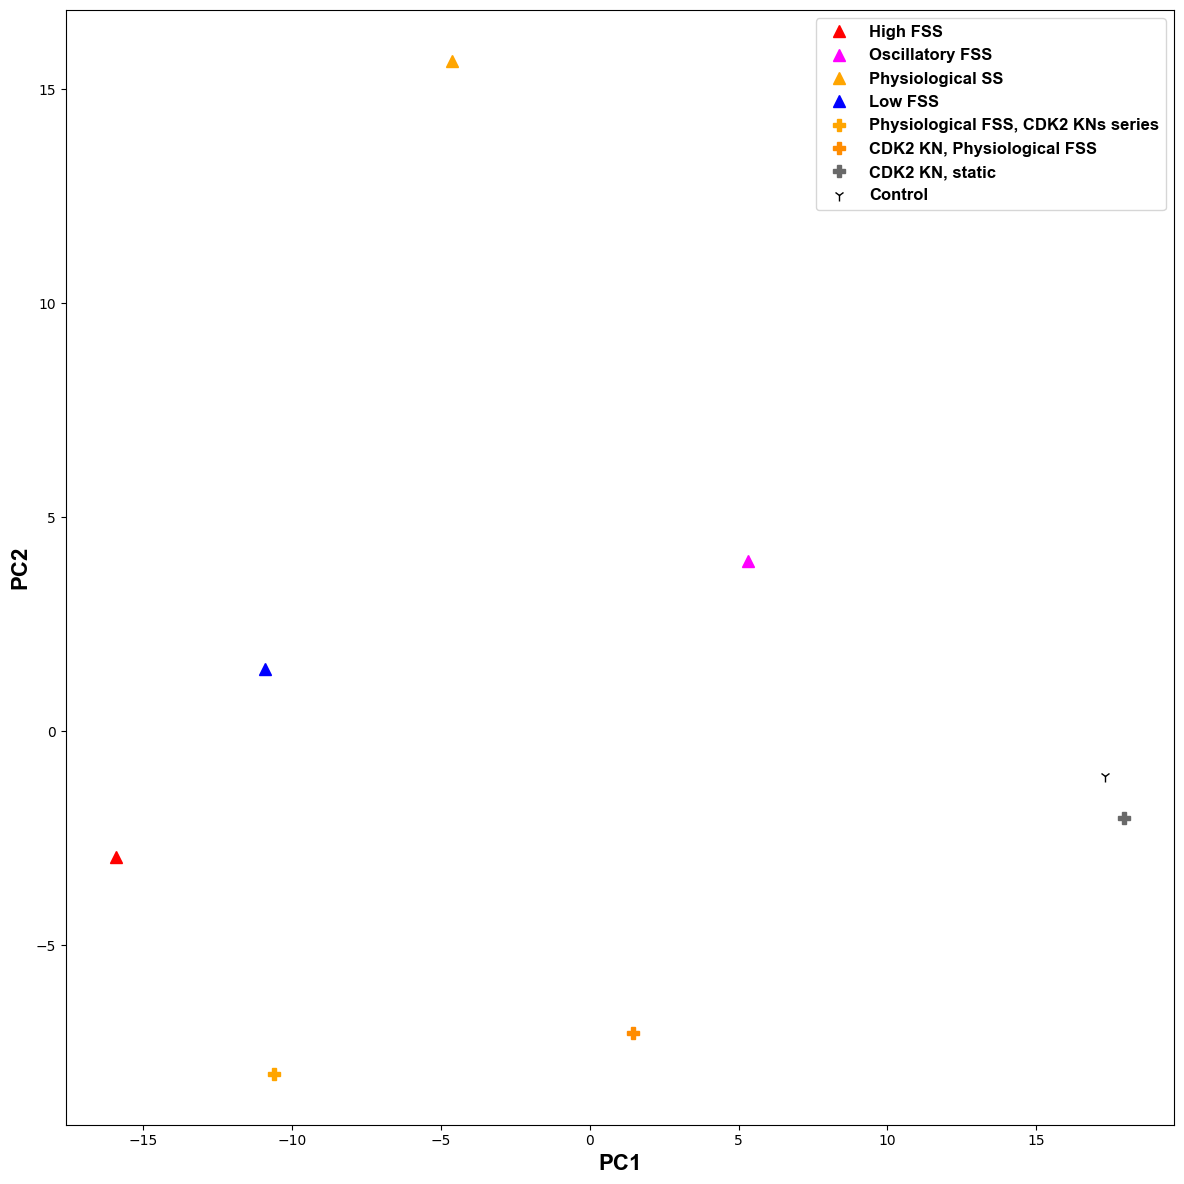

In [8]:
# 2D visualization


fig = plt.figure(figsize=(12,12))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)


# FSS conditions
ax.plot([PCA_df.loc['HSS_vs_STAT'].iloc[0]],[PCA_df.loc['HSS_vs_STAT'].iloc[1]],'^',color='red',label='High FSS',ms=8)
ax.plot([PCA_df.loc['OSS_vs_STAT'].iloc[0]],[PCA_df.loc['OSS_vs_STAT'].iloc[1]],'^',color='magenta',label='Oscillatory FSS',ms=8)
ax.plot([PCA_df.loc['PSS_vs_STAT'].iloc[0]],[PCA_df.loc['PSS_vs_STAT'].iloc[1]],'^',color='orange',label='Physiological SS',ms=8)
ax.plot([PCA_df.loc['LSS_vs_STAT'].iloc[0]],[PCA_df.loc['LSS_vs_STAT'].iloc[1]],'^',color='blue',label='Low FSS',ms=8)

# CDK2 KNs
ax.plot([PCA_df.loc['CTL_PSS_vs_CTL_STAT'].iloc[0]],[PCA_df.loc['CTL_PSS_vs_CTL_STAT'].iloc[1]],'P',color='orange',label='Physiological FSS, CDK2 KNs series',ms=8)
ax.plot([PCA_df.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[0]],[PCA_df.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[1]],'P',color='darkorange',label='CDK2 KN, Physiological FSS',ms=8)
ax.plot([PCA_df.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[0]],[PCA_df.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[1]],'P',color='dimgrey',label='CDK2 KN, static',ms=8)

# controls
ax.plot([PCA_df.loc['STAT_vs_STAT'].iloc[0]],[PCA_df.loc['STAT_vs_STAT'].iloc[1]],'1',color='black',label='Control',ms=8)

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



In [9]:
# FSS value DPD

In [10]:
# preparing training sets
LSS_lbls = ['LSS_vs_STAT']
HSS_lbls = ['HSS_vs_STAT']

LSS_smpl = total_wide.loc[LSS_lbls]
HSS_smpl = total_wide.loc[HSS_lbls]


train_smpl = pd.concat([LSS_smpl,HSS_smpl],axis=0)
cls = list(np.zeros(len(LSS_smpl.index))) + list(np.ones(len(HSS_smpl.index)))

display(train_smpl)
display(cls)

Symbol,PDGFA,TESK1,RASA1,MELK,SLC5A6,HDAC6,CSK,IKBKE,WDR61,IGFBP3,...,ADO,MACF1,KAT6B,HSPA1A,HMGA2,E2F2,TSKU,TPD52L2,VGLL4,TGFB3
LSS_vs_STAT,2.156182,0.894782,0.0,-0.66318,-1.316017,-0.728426,-0.670825,-1.440025,0.000000,0.0,...,0.000000,0.637288,0.000000,4.400808,0.0,-3.790693,1.130695,0.686068,0.000000,-1.615041
HSS_vs_STAT,1.635273,1.633040,0.0,0.00000,-1.332292,0.000000,-0.642550,-1.482412,-0.598467,0.0,...,-0.935767,0.000000,1.164677,6.956718,0.0,-2.606377,0.697545,0.688207,-0.707437,-1.112246


[0.0, 1.0]

In [11]:
# SVM classifier and STV
svc_FSS = SVC(kernel='linear')
svc_FSS.fit(train_smpl,cls)
b_coeff_FSS = svc_FSS.intercept_[0]/linalg.norm(svc_FSS.coef_[0])
norm_vec_FSS = svc_FSS.coef_[0]/linalg.norm(svc_FSS.coef_[0])

norm_vec_df = pd.DataFrame(norm_vec_FSS,index=train_smpl.columns,columns=['norm_vec_FSS'])
#norm_vec_df.sort_values(by='norm_vec_FSS',ascending=False).to_csv('STV_FSS_value.csv')

norm_vec_df.sort_values(by='norm_vec_FSS',ascending=False)

,norm_vec_FSS
Symbol,
SPDEF,0.239095
SFN,0.208281
KIF5C,0.167903
RAP1GAP,0.154845
SOX2,0.153773
...,...
DENND2D,-0.086072
SOX4,-0.087364
EDN1,-0.094737


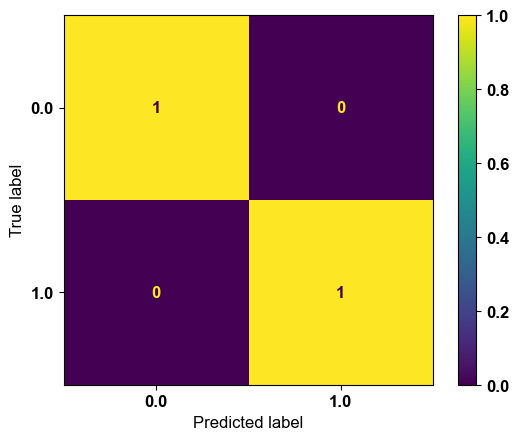

In [12]:
ConfusionMatrixDisplay.from_predictions(cls, svc_FSS.predict(train_smpl))
plt.show()
# clear separation

In [13]:
# calculating DPDs

DPD_vals = pd.DataFrame(np.zeros(len(total_wide.index)),index=total_wide.index,columns = ['DPD_FSS'])
for smpl in DPD_vals.index:
    DPD_vals.at[smpl,"DPD_FSS"] = b_coeff_FSS + np.dot(total_wide.loc[smpl],norm_vec_df['norm_vec_FSS'])

b_coeff_FSS = svc_FSS.intercept_[0]/linalg.norm(svc_FSS.coef_[0]) - DPD_vals.loc[['PSS_vs_STAT','CTL_PSS_vs_CTL_STAT'],'DPD_FSS'].mean()

for smpl in DPD_vals.index:
    DPD_vals.at[smpl,"DPD_FSS"] = b_coeff_FSS + np.dot(total_wide.loc[smpl],norm_vec_df['norm_vec_FSS'])


#DPD_vals.sort_values(by='DPD',ascending=False).to_csv('DPD_vals.csv')
DPD_vals.sort_values(by='DPD_FSS')

,DPD_FSS
LSS_vs_STAT,-7.111482
OSS_vs_STAT,-4.287453
siCDK2_STAT_vs_CTL_STAT,-3.394884
STAT_vs_STAT,-2.633848
siCDK2_PSS_vs_CTL_STAT,-2.392275
PSS_vs_STAT,-1.803714
CTL_PSS_vs_CTL_STAT,1.803714
HSS_vs_STAT,13.514037


In [14]:
# remodelling DPD

In [15]:
# preparing training sets
noremod_lbls = ['PSS_vs_STAT','CTL_PSS_vs_CTL_STAT']
remod_lbls = ['HSS_vs_STAT','LSS_vs_STAT']

noremod_smpl = total_wide.loc[noremod_lbls]
remod_smpl = total_wide.loc[remod_lbls]


train_smpl = pd.concat([noremod_smpl,remod_smpl],axis=0)
cls = list(np.zeros(len(noremod_smpl.index))) + list(np.ones(len(remod_smpl.index)))

display(train_smpl)
display(cls)

Symbol,PDGFA,TESK1,RASA1,MELK,SLC5A6,HDAC6,CSK,IKBKE,WDR61,IGFBP3,...,ADO,MACF1,KAT6B,HSPA1A,HMGA2,E2F2,TSKU,TPD52L2,VGLL4,TGFB3
PSS_vs_STAT,0.000000,1.098792,0.000000,0.00000,-0.730481,-0.679268,0.000000,-1.832115,0.000000,0.0,...,0.000000,0.000000,0.793601,2.581335,0.00000,-3.078674,0.649943,0.773004,0.902555,-0.984227
CTL_PSS_vs_CTL_STAT,1.261972,1.147937,-0.741384,0.00000,-0.872200,0.000000,-0.994642,-1.040704,0.000000,0.0,...,-1.208041,0.000000,0.000000,4.289105,-0.73988,-3.080619,1.855370,0.294210,0.000000,0.000000
HSS_vs_STAT,1.635273,1.633040,0.000000,0.00000,-1.332292,0.000000,-0.642550,-1.482412,-0.598467,0.0,...,-0.935767,0.000000,1.164677,6.956718,0.00000,-2.606377,0.697545,0.688207,-0.707437,-1.112246
LSS_vs_STAT,2.156182,0.894782,0.000000,-0.66318,-1.316017,-0.728426,-0.670825,-1.440025,0.000000,0.0,...,0.000000,0.637288,0.000000,4.400808,0.00000,-3.790693,1.130695,0.686068,0.000000,-1.615041


[0.0, 0.0, 1.0, 1.0]

In [16]:
# SVM classifier and STV
svc_remod = SVC(kernel='linear')
svc_remod.fit(train_smpl,cls)
b_coeff_remod = svc_remod.intercept_[0]/linalg.norm(svc_remod.coef_[0])
norm_vec_remod = svc_remod.coef_[0]/linalg.norm(svc_remod.coef_[0])

norm_vec_df['norm_vec_remod']=norm_vec_remod
norm_vec_df.sort_values(by='norm_vec_remod',ascending=False).to_csv('STVs_SVM_L1000.csv')

norm_vec_df#.sort_values(by='norm_vec_remod',ascending=False)

,norm_vec_FSS,norm_vec_remod
Symbol,,
PDGFA,-0.025256,0.087417
TESK1,0.035793,0.002838
RASA1,0.000000,0.036209
MELK,0.032153,-0.031725
SLC5A6,-0.000789,-0.037983
...,...,...
E2F2,0.057420,-0.020707
TSKU,-0.021001,-0.034539
TPD52L2,0.000104,0.016845


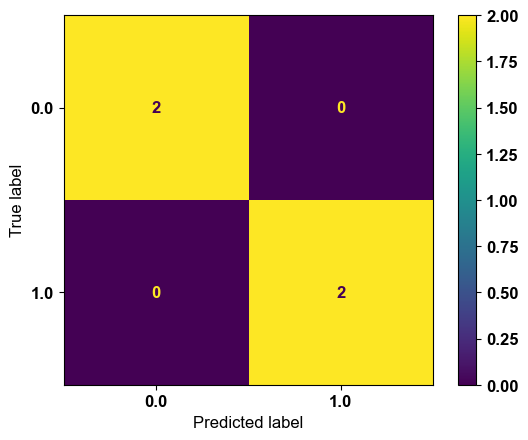

In [17]:
ConfusionMatrixDisplay.from_predictions(cls, svc_remod.predict(train_smpl))
plt.show()
# clear separation

In [18]:
# calculating DPDs

DPD_vals['DPD_remod']=np.nan
for smpl in DPD_vals.index:
    DPD_vals.at[smpl,"DPD_remod"] = b_coeff_remod + np.dot(total_wide.loc[smpl],norm_vec_df['norm_vec_remod'])


#DPD_vals.sort_values(by='DPD',ascending=False).to_csv('DPD_vals.csv')
DPD_vals.sort_values(by='DPD_remod')

,DPD_FSS,DPD_remod
STAT_vs_STAT,-2.633848,-7.741475
siCDK2_STAT_vs_CTL_STAT,-3.394884,-7.476253
CTL_PSS_vs_CTL_STAT,1.803714,-6.588620
PSS_vs_STAT,-1.803714,-6.584034
siCDK2_PSS_vs_CTL_STAT,-2.392275,-5.264507
OSS_vs_STAT,-4.287453,-4.589133
HSS_vs_STAT,13.514037,6.585444
LSS_vs_STAT,-7.111482,6.587210


In [19]:
# oscillatory FSS

In [20]:
# preparing training sets
OSS_lbls = ['OSS_vs_STAT']
PSS_lbls = ['PSS_vs_STAT','CTL_PSS_vs_CTL_STAT','HSS_vs_STAT','LSS_vs_STAT']
#PSS_lbls = ['HSS_vs_STAT','LSS_vs_STAT','NoTzLS_vs_STAT','Ntsilow_vs_STAT']

OSS_smpl = total_wide.loc[OSS_lbls]
PSS_smpl = total_wide.loc[PSS_lbls]


train_smpl = pd.concat([PSS_smpl,OSS_smpl],axis=0)
cls = list(np.zeros(len(PSS_smpl.index))) + list(np.ones(len(OSS_smpl.index)))

display(train_smpl)
display(cls)

Symbol,PDGFA,TESK1,RASA1,MELK,SLC5A6,HDAC6,CSK,IKBKE,WDR61,IGFBP3,...,ADO,MACF1,KAT6B,HSPA1A,HMGA2,E2F2,TSKU,TPD52L2,VGLL4,TGFB3
PSS_vs_STAT,0.000000,1.098792,0.000000,0.00000,-0.730481,-0.679268,0.000000,-1.832115,0.000000,0.0,...,0.000000,0.000000,0.793601,2.581335,0.000000,-3.078674,0.649943,0.773004,0.902555,-0.984227
CTL_PSS_vs_CTL_STAT,1.261972,1.147937,-0.741384,0.00000,-0.872200,0.000000,-0.994642,-1.040704,0.000000,0.0,...,-1.208041,0.000000,0.000000,4.289105,-0.739880,-3.080619,1.855370,0.294210,0.000000,0.000000
HSS_vs_STAT,1.635273,1.633040,0.000000,0.00000,-1.332292,0.000000,-0.642550,-1.482412,-0.598467,0.0,...,-0.935767,0.000000,1.164677,6.956718,0.000000,-2.606377,0.697545,0.688207,-0.707437,-1.112246
LSS_vs_STAT,2.156182,0.894782,0.000000,-0.66318,-1.316017,-0.728426,-0.670825,-1.440025,0.000000,0.0,...,0.000000,0.637288,0.000000,4.400808,0.000000,-3.790693,1.130695,0.686068,0.000000,-1.615041
OSS_vs_STAT,0.985296,0.000000,0.000000,0.00000,-0.705411,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,1.230003,0.000000,0.940078,0.500651,0.000000,-1.151881


[0.0, 0.0, 0.0, 0.0, 1.0]

In [21]:
# SVM classifier and STV
svc_OSS = SVC(kernel='linear')
svc_OSS.fit(train_smpl,cls)
b_coeff_OSS = svc_OSS.intercept_[0]/linalg.norm(svc_OSS.coef_[0])
norm_vec_OSS = svc_OSS.coef_[0]/linalg.norm(svc_OSS.coef_[0])

norm_vec_df['norm_vec_OSS']=norm_vec_OSS
norm_vec_df.sort_values(by='norm_vec_OSS',ascending=False).to_csv('STVs_SVM_L1000.csv')

norm_vec_df.sort_values(by='norm_vec_OSS',ascending=False)

,norm_vec_FSS,norm_vec_remod,norm_vec_OSS
Symbol,,,
KIT,0.028452,-0.100628,0.225402
E2F2,0.057420,-0.020707,0.176488
ELOVL6,0.069872,-0.016131,0.117974
GLI2,0.011000,-0.009566,0.114134
CCL2,0.114130,0.212269,0.111739
...,...,...,...
CXCL2,-0.026391,0.190771,-0.151058
CHAC1,-0.082431,-0.081906,-0.151954
SFN,0.208281,-0.038627,-0.157734


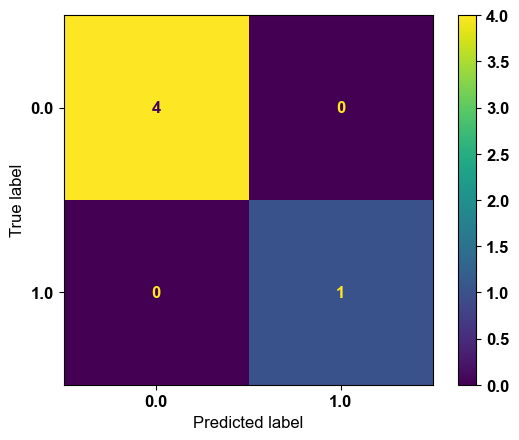

In [22]:
ConfusionMatrixDisplay.from_predictions(cls, svc_OSS.predict(train_smpl))
plt.show()
# clear separation

In [23]:
# calculating DPDs

DPD_vals['DPD_OSS']=np.nan
for smpl in DPD_vals.index:
    DPD_vals.at[smpl,"DPD_OSS"] = b_coeff_OSS + np.dot(total_wide.loc[smpl],norm_vec_df['norm_vec_OSS'])


#DPD_vals.sort_values(by='DPD',ascending=False).to_csv('DPD_vals.csv')
DPD_vals.index.name='Condition'
DPD_vals.to_csv('DPD_vals_L1000.csv')
DPD_vals.sort_values(by='DPD_OSS')


,DPD_FSS,DPD_remod,DPD_OSS
Condition,,,
HSS_vs_STAT,13.514037,6.585444,-11.594402
CTL_PSS_vs_CTL_STAT,1.803714,-6.588620,-9.220918
LSS_vs_STAT,-7.111482,6.587210,-9.216369
PSS_vs_STAT,-1.803714,-6.584034,-9.213073
siCDK2_PSS_vs_CTL_STAT,-2.392275,-5.264507,0.051018
OSS_vs_STAT,-4.287453,-4.589133,9.218643
siCDK2_STAT_vs_CTL_STAT,-3.394884,-7.476253,9.641234
STAT_vs_STAT,-2.633848,-7.741475,9.843299


In [24]:
DPD_vals.sort_values(by='DPD_remod')

,DPD_FSS,DPD_remod,DPD_OSS
Condition,,,
STAT_vs_STAT,-2.633848,-7.741475,9.843299
siCDK2_STAT_vs_CTL_STAT,-3.394884,-7.476253,9.641234
CTL_PSS_vs_CTL_STAT,1.803714,-6.588620,-9.220918
PSS_vs_STAT,-1.803714,-6.584034,-9.213073
siCDK2_PSS_vs_CTL_STAT,-2.392275,-5.264507,0.051018
OSS_vs_STAT,-4.287453,-4.589133,9.218643
HSS_vs_STAT,13.514037,6.585444,-11.594402
LSS_vs_STAT,-7.111482,6.587210,-9.216369


In [25]:
angle_FSS_OSS = (np.arccos(np.dot(norm_vec_df['norm_vec_FSS'],norm_vec_df['norm_vec_OSS']))/np.pi)*180
print(angle_FSS_OSS)

angle_remod_OSS = (np.arccos(np.dot(norm_vec_df['norm_vec_remod'],norm_vec_df['norm_vec_OSS']))/np.pi)*180
print(angle_remod_OSS)

angle_FSS_remod = (np.arccos(np.dot(norm_vec_df['norm_vec_FSS'],norm_vec_df['norm_vec_remod']))/np.pi)*180
print(angle_FSS_remod)


96.62067881261106
93.82014445881404
90.00490699951565


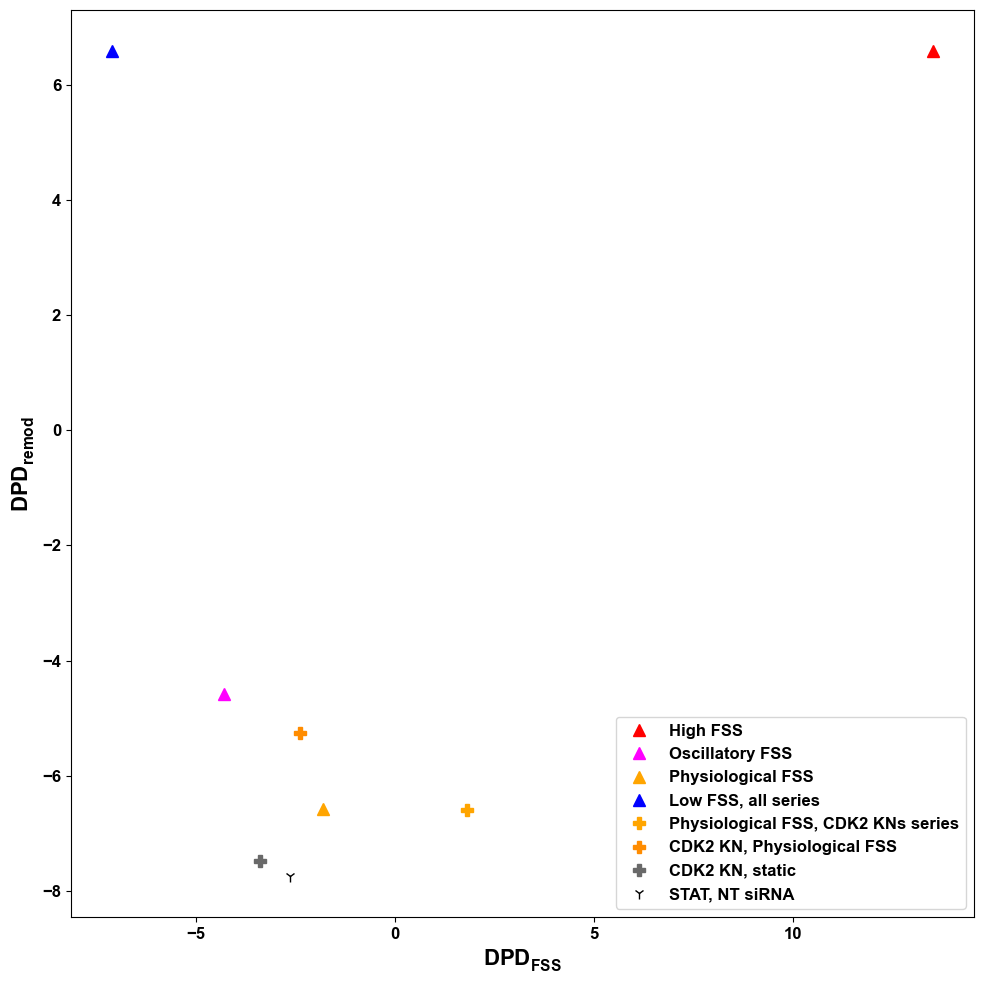

In [26]:
# 2D DPD visualization


fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

xc = 0
yc = 1

ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='red',label='High FSS',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='magenta',label='Oscillatory FSS',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Low FSS, all series',ms=8)

# CDK2 KNs
ax.plot([DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[yc]],'P',color='orange',label='Physiological FSS, CDK2 KNs series',ms=8)
ax.plot([DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[yc]],'P',color='darkorange',label='CDK2 KN, Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[yc]],'P',color='dimgrey',label='CDK2 KN, static',ms=8)


ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'1',color='black',label='STAT, NT siRNA',ms=8)

ax.set_xlabel(r'$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel(r'$\mathregular{DPD_{remod}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



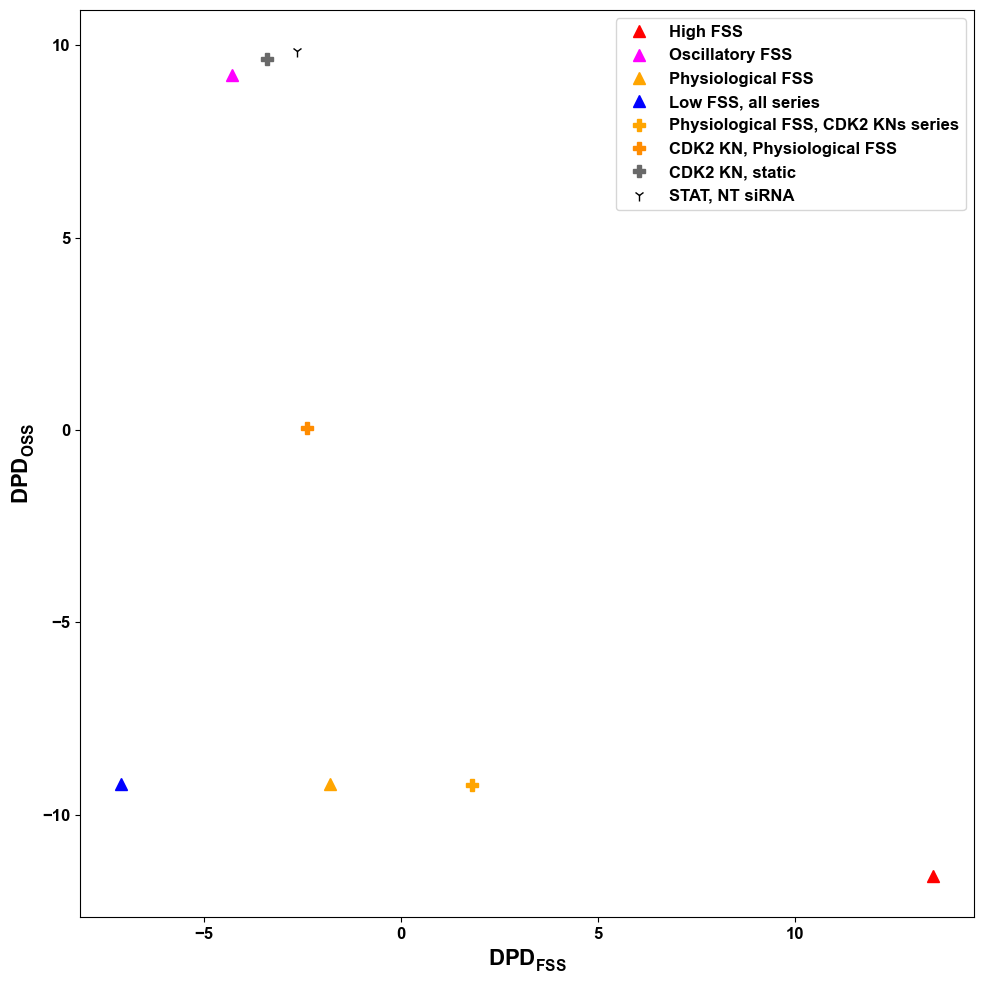

In [27]:
# 2D DPD visualization


fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

xc = 0
yc = 2

ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='red',label='High FSS',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='magenta',label='Oscillatory FSS',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Low FSS, all series',ms=8)

# CDK2 KNs
ax.plot([DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[yc]],'P',color='orange',label='Physiological FSS, CDK2 KNs series',ms=8)
ax.plot([DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[yc]],'P',color='darkorange',label='CDK2 KN, Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[yc]],'P',color='dimgrey',label='CDK2 KN, static',ms=8)


ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'1',color='black',label='STAT, NT siRNA',ms=8)

ax.set_xlabel(r'$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel(r'$\mathregular{DPD_{OSS}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()

